In [19]:
import matplotlib.pyplot as plt
from collections import Counter
from itertools import product
from Bio import SeqIO

def count_kmers(fasta_file, k):
    # initialize empty list to store k-mers
    kmers = []
    # open fasta file and iterate over sequences
    with open(fasta_file) as f:
        for record in SeqIO.parse(f, "fasta"):
            # extract sequence and iterate over k-mers
            sequence = str(record.seq)
            for i in range(len(sequence)-k+1):
                kmer = sequence[i:i+k]
                k_dic = generate_all_kmers(k)
                kmers.append(k_dic[kmer])
    # count frequency of each k-mer
    kmer_counts = Counter(kmers)
    return kmer_counts

def generate_all_kmers(k):
    alphabet = "ACGT"
    kmers = [''.join(p) for p in product(alphabet, repeat=k)]
    # print(kmers)
    idx = 0
    kmer_dict = {}
    for kmer in kmers:
        idx = idx + 1
        kmer_dict[kmer] = idx
    return kmer_dict
# example usage


{1: 726, 2: 417, 3: 686, 4: 556, 5: 635, 6: 431, 7: 197, 8: 590, 9: 681, 10: 656, 11: 791, 12: 465, 13: 424, 14: 475, 15: 740, 16: 534, 17: 552, 18: 626, 19: 901, 20: 663, 21: 793, 22: 731, 23: 299, 24: 822, 25: 151, 26: 199, 27: 250, 28: 246, 29: 355, 30: 732, 31: 847, 32: 766, 33: 657, 34: 414, 35: 570, 36: 540, 37: 603, 38: 729, 39: 192, 40: 587, 41: 719, 42: 663, 43: 701, 44: 518, 45: 495, 46: 478, 47: 733, 48: 415, 49: 433, 50: 400, 51: 454, 52: 424, 53: 715, 54: 745, 55: 155, 56: 704, 57: 625, 58: 584, 59: 859, 60: 893, 61: 441, 62: 641, 63: 636, 64: 871}


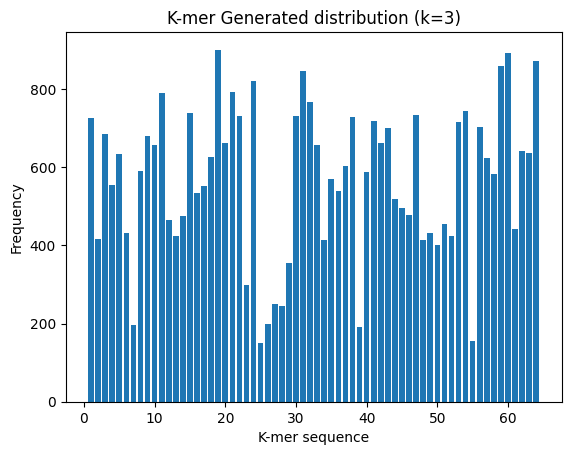

In [20]:
fasta_file_gen = 'gen.fa'
k = 3
kmer_counts_gen = count_kmers(fasta_file_gen, k)
kmer_counts_gen = dict(sorted(kmer_counts_gen.items()))
print(kmer_counts_gen)
# create bar chart of k-mer frequency
plt.bar(kmer_counts_gen.keys(), kmer_counts_gen.values())
plt.xlabel('K-mer sequence')
plt.ylabel('Frequency')
plt.title('K-mer Generated distribution (k={})'.format(k))
# plt.show()
plt.savefig('gen_kmer_dis.png')



{1: 743, 2: 461, 3: 661, 4: 559, 5: 674, 6: 474, 7: 213, 8: 581, 9: 632, 10: 629, 11: 812, 12: 492, 13: 405, 14: 435, 15: 678, 16: 514, 17: 599, 18: 685, 19: 888, 20: 632, 21: 806, 22: 795, 23: 291, 24: 828, 25: 173, 26: 230, 27: 276, 28: 202, 29: 367, 30: 754, 31: 917, 32: 747, 33: 629, 34: 423, 35: 642, 36: 445, 37: 630, 38: 767, 39: 220, 40: 648, 41: 702, 42: 745, 43: 740, 44: 501, 45: 398, 46: 449, 47: 671, 48: 441, 49: 447, 50: 377, 51: 385, 52: 394, 53: 706, 54: 695, 55: 157, 56: 721, 57: 620, 58: 654, 59: 861, 60: 755, 61: 437, 62: 640, 63: 627, 64: 851}


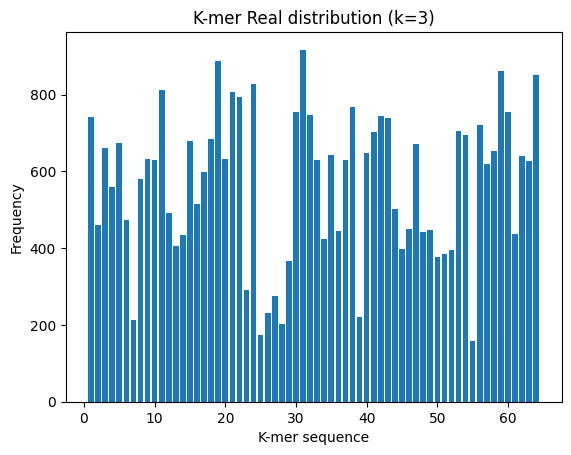

In [21]:
fasta_file_real = 'real.fa'
k = 3
kmer_counts_real = count_kmers(fasta_file_real, k)
kmer_counts_real = dict(sorted(kmer_counts_real.items()))
print(kmer_counts_real)
# create bar chart of k-mer frequency
plt.bar(kmer_counts_real.keys(), kmer_counts_real.values())
plt.xlabel('K-mer sequence')
plt.ylabel('Frequency')
plt.title('K-mer Real distribution (k={})'.format(k))
# plt.show()
plt.savefig('real_kmer_dis.png')



{1: -17, 2: -44, 3: 25, 4: -3, 5: -39, 6: -43, 7: -16, 8: 9, 9: 49, 10: 27, 11: -21, 12: -27, 13: 19, 14: 40, 15: 62, 16: 20, 17: -47, 18: -59, 19: 13, 20: 31, 21: -13, 22: -64, 23: 8, 24: -6, 25: -22, 26: -31, 27: -26, 28: 44, 29: -12, 30: -22, 31: -70, 32: 19, 33: 28, 34: -9, 35: -72, 36: 95, 37: -27, 38: -38, 39: -28, 40: -61, 41: 17, 42: -82, 43: -39, 44: 17, 45: 97, 46: 29, 47: 62, 48: -26, 49: -14, 50: 23, 51: 69, 52: 30, 53: 9, 54: 50, 55: -2, 56: -17, 57: 5, 58: -70, 59: -2, 60: 138, 61: 4, 62: 1, 63: 9, 64: 20}


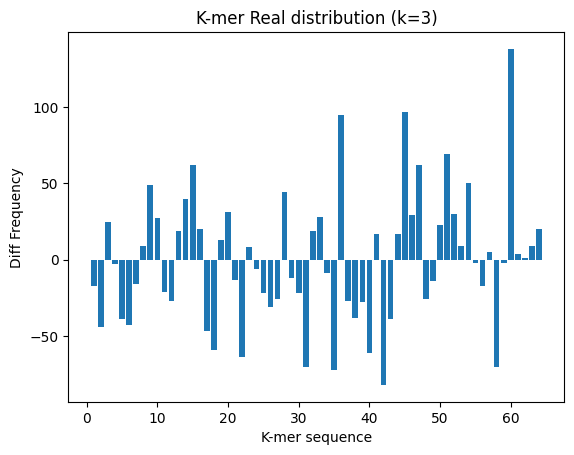

In [22]:
diff = {k: kmer_counts_gen[k] - kmer_counts_real[k] for k in kmer_counts_gen}
print(diff)
plt.bar(diff.keys(), diff.values())
plt.xlabel('K-mer sequence')
plt.ylabel('Diff Frequency')
plt.title('K-mer Real distribution (k={})'.format(k))
# plt.show()
plt.savefig('diff.png')

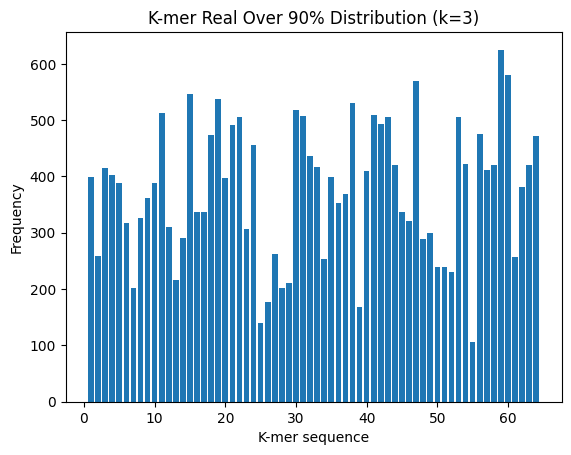

In [18]:
fasta_file_real = 'real_over90.fa'
k = 3
kmer_counts_90_real = count_kmers(fasta_file_real, k)
kmer_counts_90_real = dict(sorted(kmer_counts_90_real.items()))
# print(kmer_counts_real)
# create bar chart of k-mer frequency
plt.bar(kmer_counts_90_real.keys(), kmer_counts_90_real.values())
plt.xlabel('K-mer sequence')
plt.ylabel('Frequency')
plt.title('K-mer Real Over 90% Distribution (k={})'.format(k))
# plt.show()
plt.savefig('real_90%_kmer_dis.png')